In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skfuzzy as fuzzy
from skimage import data, io, color, transform, filters
import skimage as ski
#import imglib as lib
from matplotlib.colors import Normalize
from skimage.morphology import binary_dilation

In [3]:
import numpy as np
import cv2

ModuleNotFoundError: No module named 'kivy'

In [6]:
from PIL import Image as PImage

path = '../datos/panda.jpg'
img = PImage.open(path)
img_g = img.convert('L')
img_g = lib.img_as_uint8(img_g)
img2 = lib.ecu_hist(img_g)

img_canvas = np.zeros(img_g.shape, dtype=np.uint8)
idx = int(img_canvas.shape[0] * 0.3)
img_canvas[:, :idx] = img_g[:, :idx]
img_canvas[:, idx:] = img2[:, idx:]

plt.imshow(img_canvas, cmap='gray')

NameError: name 'lib' is not defined

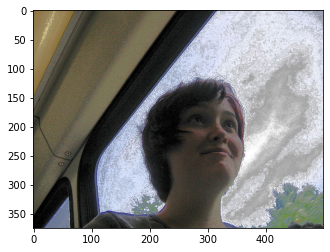

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imglib as lib

def trans_v_bgr(img, trans):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    v_eq = trans(np.copy(img_hsv[:,:,2]))
    img_hsv[:,:,2] = v_eq
    img_trans = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
    return img_trans

def trans_v_rgb(img, trans):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    v_eq = trans(np.copy(img_hsv[:,:,2]))
    img_hsv[:,:,2] = v_eq
    img_trans = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    return img_trans

def clahe_bgr(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_eq = trans_v_bgr(img, clahe.apply)
    return img_eq

def ecu_hist_bgr(img):
    return trans_v_bgr(img, lib.ecu_hist)#cv2.equalizeHist)
    
    
img = cv2.imread('../datos/backlit.jpg', cv2.IMREAD_UNCHANGED)
img_eq = ecu_hist_bgr(img)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB)
#img = cv2.flip(img, 0)
img_canvas = np.zeros(img.shape, dtype=np.uint8)

idx = 300
img_canvas[:,:idx,:] = img[:,:idx,:]
img_canvas[:,idx:,:] = img_eq[:,idx:,:]

plt.imshow(img_eq)

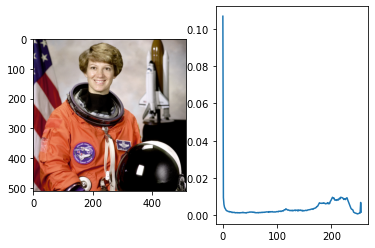

In [2]:
img = data.astronaut()
img_hsv = color.rgb2hsv(img)
img_v = img_hsv[:, : ,2]

img_v_eq = lib.ecu_hist(img_v)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.plot(lib.histograma(img_v))

In [4]:
a = np.arange(0, 4)
b = np.arange(3, 7)

(a-b)**2

array([9, 9, 9, 9])

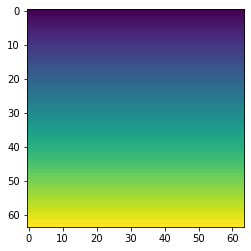

In [36]:
dim = (1,4)#(64, 256)
arr1 = np.concatenate([
    np.zeros(dim),
    (1/3)*np.ones(dim),
    (2/3)*np.ones(dim),
    np.ones(dim)])

R = 64
C = 64
arr2 = [[[r**2/R**2, c/C, 0.5] for c in range(C)] for r in range(R)]
arr3 = [[[0.5, r/R, 0.5] for c in range(C)] for r in range(R)]
arr4 = [[r/R for c in range(C)] for r in range(R)]

plt.imshow(arr4)

In [18]:
a= [[[2*i-3*j+k for k in range(3)] for j in range(4)]
    for i in range(5)]
a, np.reshape(a, (-1, 3))

([[[0, 1, 2], [-3, -2, -1], [-6, -5, -4], [-9, -8, -7]],
  [[2, 3, 4], [-1, 0, 1], [-4, -3, -2], [-7, -6, -5]],
  [[4, 5, 6], [1, 2, 3], [-2, -1, 0], [-5, -4, -3]],
  [[6, 7, 8], [3, 4, 5], [0, 1, 2], [-3, -2, -1]],
  [[8, 9, 10], [5, 6, 7], [2, 3, 4], [-1, 0, 1]]],
 array([[ 0,  1,  2],
        [-3, -2, -1],
        [-6, -5, -4],
        [-9, -8, -7],
        [ 2,  3,  4],
        [-1,  0,  1],
        [-4, -3, -2],
        [-7, -6, -5],
        [ 4,  5,  6],
        [ 1,  2,  3],
        [-2, -1,  0],
        [-5, -4, -3],
        [ 6,  7,  8],
        [ 3,  4,  5],
        [ 0,  1,  2],
        [-3, -2, -1],
        [ 8,  9, 10],
        [ 5,  6,  7],
        [ 2,  3,  4],
        [-1,  0,  1]]))

In [113]:
import numpy as np
np.random.seed(42)
a = np.random.randint(0, 9, (5, 5))
b = a<0
c = np.zeros(a.shape)
b[1:3,:] = True
c[b] = a[b]
print(a)
s = list(range(10, 0, -1))
print(s)
f = lambda x : s[x]
f = np.vectorize(f)
a[b] = f(a[b])
print(a)

[[6 3 7 4 6]
 [2 6 7 4 3]
 [7 7 2 5 4]
 [1 7 5 1 4]
 [0 5 8 0 2]]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[[6 3 7 4 6]
 [8 4 3 6 7]
 [3 3 8 5 6]
 [1 7 5 1 4]
 [0 5 8 0 2]]


(<matplotlib.image.AxesImage at 0x7f9a9f9479a0>, 255)

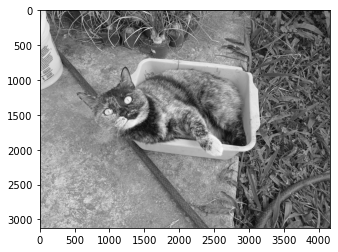

In [17]:
import numpy as np
import cv2
from skimage import io, data, color
from skimage.filters import threshold_mean
import matplotlib.pyplot as plt

img = cv2.imread('../datos/galleta.jpg', 0)
#img = data.camera()

#img_bin = img > threshold_mean(img)

# plt.subplot(121)
# plt.imshow(img), cmap='gray')
# plt.subplot(122)
# plt.imshow(img_bin, cmap='gray')

plt.imshow(img, cmap='gray'), img.max()

In [6]:
a = np.arange(25).reshape(5, 5)*0.5

b = np.array(a)

b[1,3] = 23
a, b

(array([[ 0. ,  0.5,  1. ,  1.5,  2. ],
        [ 2.5,  3. ,  3.5,  4. ,  4.5],
        [ 5. ,  5.5,  6. ,  6.5,  7. ],
        [ 7.5,  8. ,  8.5,  9. ,  9.5],
        [10. , 10.5, 11. , 11.5, 12. ]]),
 array([[ 0. ,  0.5,  1. ,  1.5,  2. ],
        [ 2.5,  3. ,  3.5, 23. ,  4.5],
        [ 5. ,  5.5,  6. ,  6.5,  7. ],
        [ 7.5,  8. ,  8.5,  9. ,  9.5],
        [10. , 10.5, 11. , 11.5, 12. ]]))

In [7]:
import numpy as np
a = np.array([[1, 4, 6], [3, 1, 2], [8, 3, 5]])

low = a < 3
high = a > 3

a, a[2][0], a[2,0]

(array([[1, 4, 6],
        [3, 1, 2],
        [8, 3, 5]]),
 8,
 8)

In [ ]:
path = "../datos/panda.jpg"
img = io.imread(path)
img = color.rgb2gray(img)

mask = np.zeros(img.shape)
pos = (100, 200)
mask[pos] = 1
dil_mask = binary_dilation(mask)
dil_mask = binary_dilation(dil_mask)

np.sum(mask), np.sum(dil_mask)

In [21]:
img = np.arange(16).reshape(4,4)
reg = np.zeros((4,4), dtype=np.bool)
reg[1,1] = True
bor = binary_dilation(reg) & ~reg
c = a[b] < 2
b

array([[False,  True, False, False],
       [ True, False,  True, False],
       [False,  True, False, False],
       [False, False, False, False]])

In [13]:
def pasabajos_ideal(shape, f_corte):
    fil, col = shape
    y, x = np.ogrid[-fil/2:fil/2, -col/2:col/2]
    filtro = x**2 + y**2 <= f_corte**2
    return filtro.astype(float)

def pasabajos_ideal_og(shape, f_corte):
    fil, col = shape
    filtro = np.zeros(shape)
    for i in range(fil):
        for j in range(col):
            circulo = np.sqrt((fil/2-i)**2 + (col/2-j)**2)
            if circulo < f_corte:
                filtro[i,j] = 1
    return filtro

img = np.ones((1000,2000))

In [17]:
%%time
pasabajos_ideal_og(img.shape, 300)
0

CPU times: user 2.09 s, sys: 3.87 ms, total: 2.1 s
Wall time: 2.1 s


0

In [18]:
%%time
pasabajos_ideal(img.shape, 300)
0

CPU times: user 9.01 ms, sys: 11 µs, total: 9.02 ms
Wall time: 8.42 ms


0

In [11]:
import numpy as np
from scipy.spatial.transform import Rotation as R

a = np.array([[11, 0], [1,45], [11, 0], [0, 0], [0, 0], [11, 0], 
              [52, 0], [52, 0], [0, 0], [0, 48], [2, 40], [0, 0], 
              [0, 0], [0, 0], [0, 45], [0, 53], [0, 53], [0, 0]])
points = np.argwhere(a)
n = np.argwhere(a).shape[0]
points = np.concatenate((points, np.zeros((n,1))), axis=1)

rot = R.from_rotvec((0, 0.6, 0))

# rot.as_matrix(), b[3], np.dot(rot.as_matrix(), b[3])
#     for punto in range(n):
#         b[punto] = np.dot(rot, puntos[punto])

*a.T

SyntaxError: can't use starred expression here (<ipython-input-11-54bf124a04a8>, line 17)

In [39]:
rot = R.from_rotvec((0, 0.6, 0)).as_matrix()
rot # .to_matrix()

array([[ 0.82533561,  0.        ,  0.56464247],
       [ 0.        ,  1.        ,  0.        ],
       [-0.56464247,  0.        ,  0.82533561]])

In [27]:
import numpy as np

a = np.arange(0,10).reshape(-1,1)
b = np.ones((10))

a*b, np.sum(a*b, axis=0)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
        [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
        [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
        [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
        [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]]),
 array([45., 45., 45., 45., 45., 45., 45., 45., 45., 45.]))

In [33]:
list(enumerate(np.arange(0,30).reshape(6,5)))

[(0, array([0, 1, 2, 3, 4])),
 (1, array([5, 6, 7, 8, 9])),
 (2, array([10, 11, 12, 13, 14])),
 (3, array([15, 16, 17, 18, 19])),
 (4, array([20, 21, 22, 23, 24])),
 (5, array([25, 26, 27, 28, 29]))]

In [ ]:
transformada = np.ones((32,24))
a=1#factor de amplificacion
longitud=len(transformada[0])
tetha=len(transformada)
vector=np.arange( -np.pi, np.pi-(2*np.pi)/(longitud+1), (2*np.pi)/(longitud+1) )
rn1 = np.abs( 2/a*np.sin(a*vector/2) )
rn2 = np.sin(a*vector/2)
rd = (a*vector)/2
r = rn1 * (rn2/rd)**2